In [57]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

%matplotlib inline

In [75]:
def distance(node1,node2):
    x1 = node1[0]
    x2 = node2[0]
    y1 = node1[1]
    y2 = node2[1]
    return sqrt((x2-x2)**2 + (y2-y1)**2)

def max_distance(points):
    current = 0
    for node1 in points:
        for node2 in points:
            d = distance(node1,node2)
            if d>current: 
                current=d
    return current


def allocation(passengers, destination, m_prime):
    # passengers is a list of tuples - ID, x, y
    # destination is a tuple
    G=nx.DiGraph()
    # Step 1
    G.add_node("source", type="meta")
    G.add_node("sink", type="meta")
    i = 1
    # Step 2
    for passenger in passengers:
        G.add_node("{}in".format(i), number=i, x=passenger[0], y=passenger[1], type="passenger in")
        G.add_node("{}out".format(i),number=i, x=passenger[0], y=passenger[1], type="passenger out")
        G.add_edge("{}in".format(i), "{}out".format(i), cost=0, capacity=1)
        i+=1
    G.add_node("destination", x=destination[0], y=destination[1], type="destination")
    
    # Step 3
    for node in G.nodes(data=True):
        if node[1]['type']=="passenger in":
            G.add_edge("source", node[0], cost=0, capacity=1)
        
    # Step 4
    # We create n edges, one each of cost SuD and capacity 1 from each 
    # of the exit vertices uout, u ∈ N, to the dropoff vertex n + 1
    for node in G.nodes(data=True):
        if node[1]['type']=="passenger out":
            cost = distance(destination, (node[1]['x'],node[1]['y']))
            G.add_edge(node[0],"destination", cost=cost, capacity=1)
    
    # Step 5
    # Calculating L
    L = 2*max_distance(passengers + [destination]) + 1
    for u in range(1,len(passengers)+1):
        for v in range(u+1, len(passengers)+1):
            G.add_edge("{}out".format(u), "{}in".format(v), cost=distance(passengers[u-1], passengers[v-1]), capacity=1)
    
    
    
    # Step 6
    G.add_edge("destination", "sink", cost=0, capacity=m_prime)
    return G


In [76]:
G = allocation([(0,0), (1,1)], (2,2), 1)
G.nodes(data=True)

[('1in', {'number': 1, 'type': 'passenger in', 'x': 0, 'y': 0}),
 ('2out', {'number': 2, 'type': 'passenger out', 'x': 1, 'y': 1}),
 ('destination', {'type': 'destination', 'x': 2, 'y': 2}),
 ('2in', {'number': 2, 'type': 'passenger in', 'x': 1, 'y': 1}),
 ('source', {'type': 'meta'}),
 ('1out', {'number': 1, 'type': 'passenger out', 'x': 0, 'y': 0}),
 ('sink', {'type': 'meta'})]

In [77]:
G.edges(data=True)

[('1in', '1out', {'capacity': 1, 'cost': 0}),
 ('2out', 'destination', {'capacity': 1, 'cost': 1.0}),
 ('destination', 'sink', {'capacity': 1, 'cost': 0}),
 ('2in', '2out', {'capacity': 1, 'cost': 0}),
 ('source', '2in', {'capacity': 1, 'cost': 0}),
 ('source', '1in', {'capacity': 1, 'cost': 0}),
 ('1out', '2in', {'capacity': 1, 'cost': 1.0}),
 ('1out', 'destination', {'capacity': 1, 'cost': 2.0})]

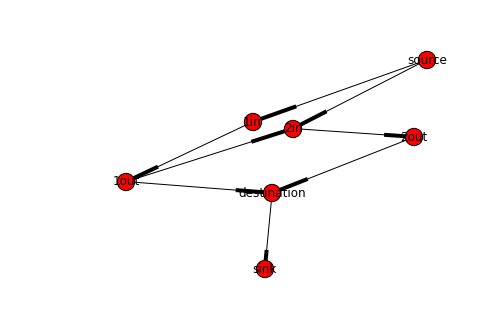

In [78]:
nx.draw(G, with_labels=True)